# load Ground Truth (FRINGE ANALYSIS only)

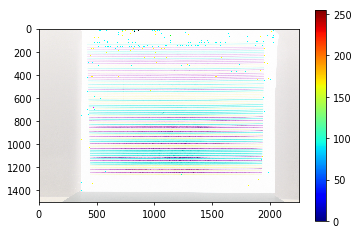

In [1]:
import scipy.io as sio
from extras.FPP_functions import *
from DnnFPP.CNNFunctions import *



dir_ = '../CapImages/Set6/'

dirFlat = dir_ + 'ref2'
ftype = 'GT'
temp = sio.loadmat(dirFlat + '/' + '{0}.mat'.format(ftype))
FlatRef = temp['GT_Fringe']
FlatRef2 = temp['FDB_flat']



dirObject = dir_  + 'jug2'
ftype = 'GT'
temp = sio.loadmat(dirObject + '/' + '{0}.mat'.format(ftype))
temp.keys()

maskGT = temp['GT_mask']
flatGT = temp['GT_flat']
fringeGT = temp['GT_Fringe']
CRoiGT = temp['GT_cRoi'][0]
RRoiGT = temp['GT_rRoi'][0]


imagesc(FlatRef2)


# Loading Object for Fringe Analysis

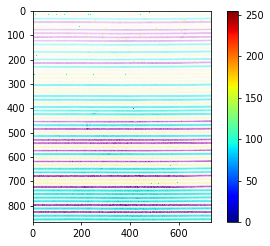

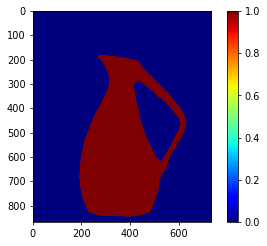

In [2]:
import cv2
import numpy as np
import scipy.ndimage as ndi



ftype = 'FDB'
fname = dir_ + 'jug2/' + ftype + '_1.jpg'
rec = cv2.imread(fname).astype(np.float32)
ftype = 'F2'
fname = dir_ + 'jug2/' + ftype + '_1.jpg'
tmp1 = cv2.imread(fname, 0).astype(np.float32)
ftype = 'F2'
fname = dir_ + 'jug2/' + ftype + '_2.jpg'
tmp2 = cv2.imread(fname, 0).astype(np.float32)
maskRec = (tmp1 + tmp2)/2

ref2 = FlatRef2[RRoiGT[0]+200:RRoiGT[1]-200, CRoiGT[0]+400:CRoiGT[1]-400,:]
rec = rec[RRoiGT[0]+200:RRoiGT[1]-200, CRoiGT[0]+400:CRoiGT[1]-400,:]
mask = maskGT[RRoiGT[0]+200:RRoiGT[1]-200, CRoiGT[0]+400:CRoiGT[1]-400]
maskRec = maskRec[RRoiGT[0]+200:RRoiGT[1]-200, CRoiGT[0]+400:CRoiGT[1]-400]



maskRec = maskRec > 180
maskRec = ndi.binary_dilation(maskRec, iterations=15)
maskRec = ndi.binary_erosion(maskRec, iterations=15)


imagesc(ref2)
imagesc(maskRec)

# load CNN model and execute

Constructor
length of layers =  14
length of layers =  14
154.49200000000474 ms


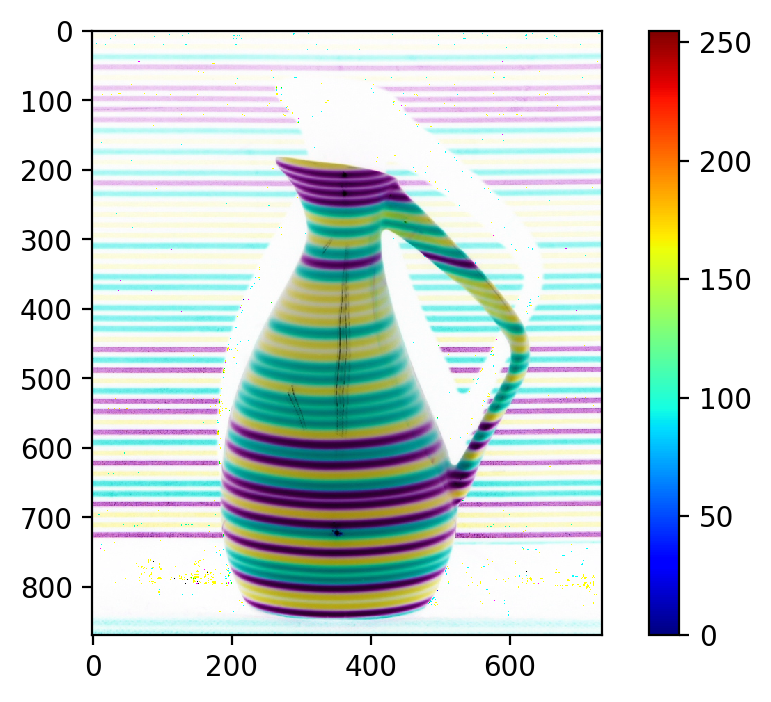

In [53]:
from models.model import *
from models.model import _netG
import torch


nChannel = 1
inChannel = 3
modeltype = 'B'

filename= 'saved/%s/cp_16_0.1_65_1.pth' % (modeltype)

netG = _netG(in_channel = inChannel, out_channels = nChannel, init_weights=True, modelType=modeltype)
netG.cuda()

checkpoint = torch.load(filename)
netG.load_state_dict(checkpoint['state_dict'])

ref =processCNN(netG,ref2) 

imagesc(rec.astype(np.uint8), dpi_=200)

# figure;
# plot(out[:,400])
# plot(ref[:,400],strFormat='r')
# show()

In [48]:
from extras.pytorch_cnn_vis.cnn_layer_visualization import *


out = processCNN(netG,rec)
# vis = CNNLayerVisualization(netG, 5, 1)
# vis.visualise_layer_with_hooks()
# imagesc(out, dpi_=200, cmap_='gray')


214.37300000000192 ms


# phase unwrapping (unfinished)

(869, 734)


/home/buddy/anaconda2/envs/my_env/lib/python3.5/site-packages/unwrap/unwrap2D.py:30: UserWarning: implicit cast from 'char *' to a different pointer type: will be forbidden in the future (check that the types are as you expect; use an explicit ffi.cast() if they are correct)
  wrap_around_x, wrap_around_y)


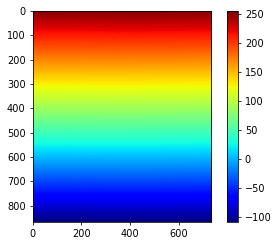

(869, 734)


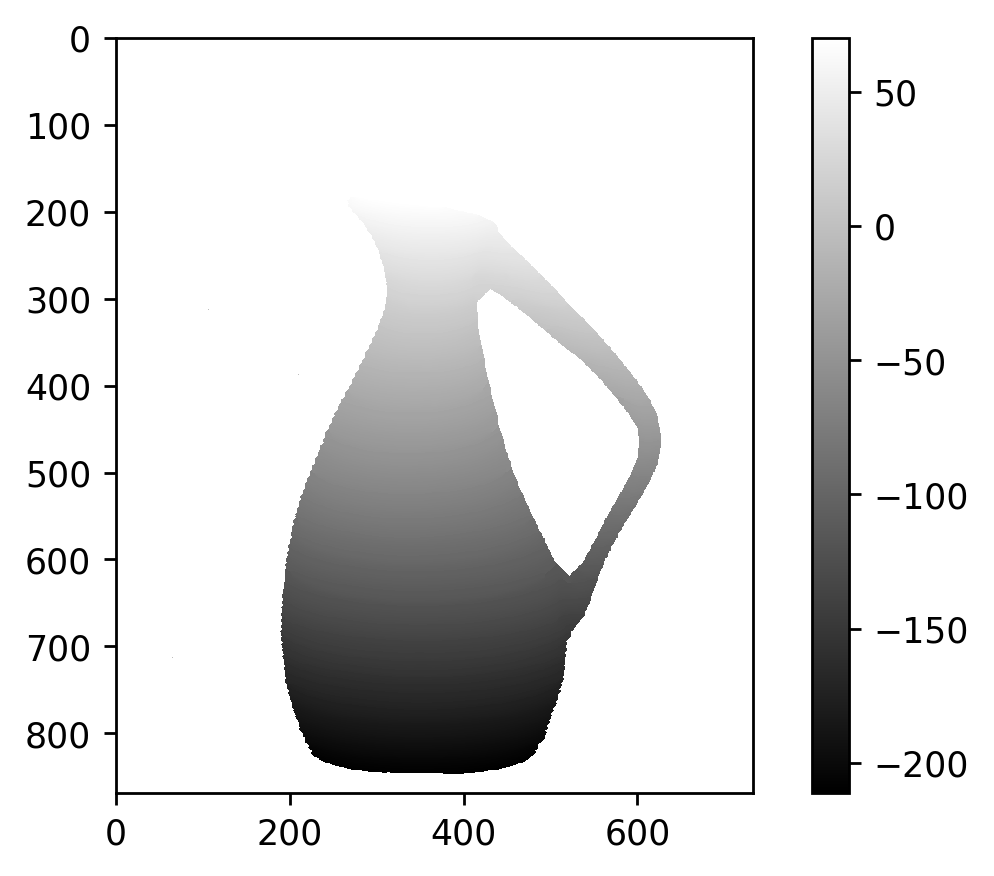

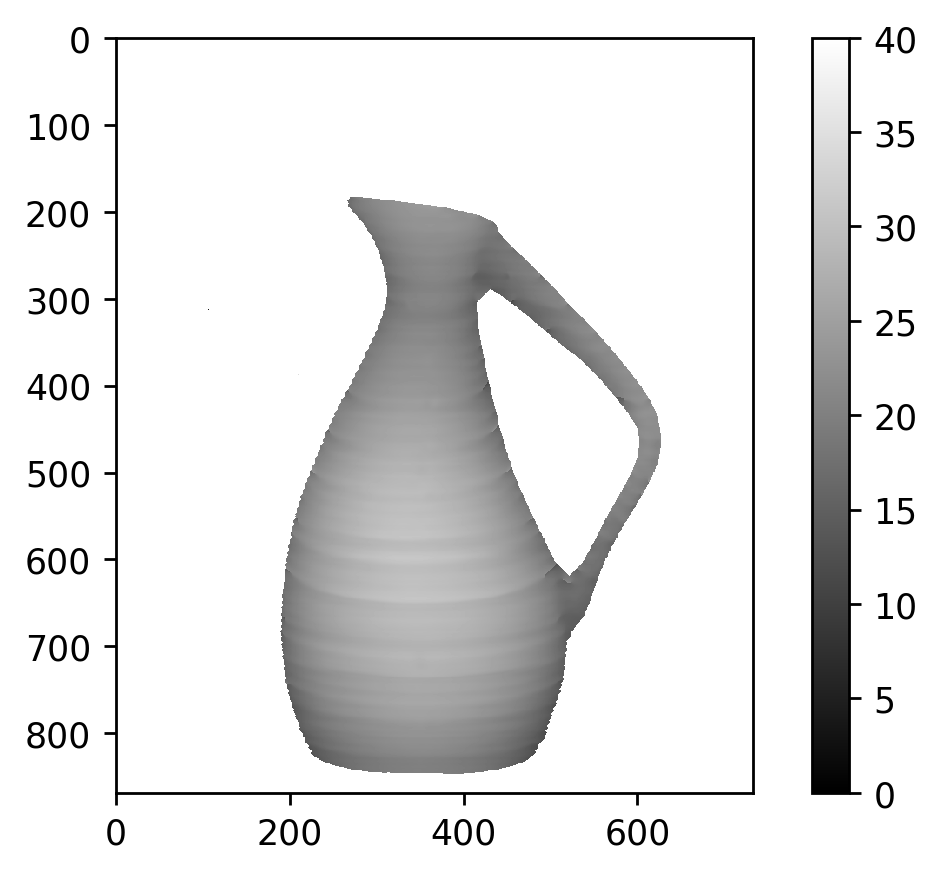

test


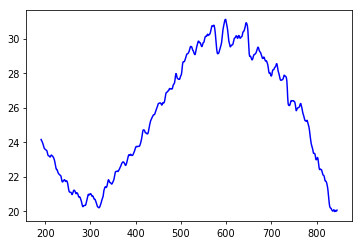

In [16]:
###### from models.model_wav import _netG

import numpy as np
import time
from unwrap import unwrap
from scipy.signal import hilbert
import time
from unwrap import unwrap

print(ref.shape)
phiRef = hilbert(ref, axis=0)
phiRef = np.arctan2(real(phiRef), imag(phiRef))
shapeRef= unwrap(phiRef)
imagesc(shapeRef)

print(out.shape)
phiRec = hilbert(out, axis=0)
phiRec = np.angle(phiRec)
phiRec = phiRec 
tmpMask = 1-maskRec[:, :]
tmp = np.ma.array(-phiRec, dtype = np.float32, mask = tmpMask)
shapeRec= unwrap(tmp)  
# shapeRec = unwrapGold(phiRec, maskRec[:-1, :]==1 )


shape = shapeRec-shapeRef [:, :]+130
imagesc(shapeRec, dpi_=250, cmap_='gray')
# imagesc(-shapeRec, dpi_=250, cmap_='gray')

imagesc(shape, dpi_=250, cmap_='gray', mn=0, mx=40)
print("test")


figure
plot(shape[:, 350])
show()
# print("mask = ", mask.shape)
# mask = np.zeros_like(phiRec, dtype = np.uint8)
# print("mask = ", mask.shape)
# phi_wrapped_masked = np.ma.array(phiRec, dtype = np.float32, mask = mask)
# phi_unwrapped_masked = unwrap(phi_wrapped_masked)
# 
# imagesc(phi_unwrapped_masked, dpi_=250, cmap_='gray')
# 
# # a={}
# # a['KMapCodeOut']=out
# # sio.savemat(filenameOut,a)
# print(len(fr_inp.shape))
# 
